In [4]:
#TSP Environment
import gym
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist



# Define the environment
class TSPEnv(gym.Env):
  def __init__(self, n_cities=4, show_debug_data = False, test_environment = False):
    self.n_cities = n_cities
    self.xy = (np.random.rand(self.n_cities,2)*100).round(2)
    #self.xy = np.array([[20.01, 80.01], [10.01, 50.01],[50.01, 30.01],[80.01 , 80.01]])
    self.x=self.xy[:,0]
    self.y=self.xy[:,1]
    self.step_counter = 0
    self.show_debug_data = show_debug_data
    self._array_visited = np.zeros(self.n_cities)
    self._total_distance = 0
    self.test = test_environment
    

    #print(f'genrated stops xy: {self.xy}')
    self.distance_matrix = cdist(self.xy,self.xy,'euclidean').round(0)
    # print(self.distance_matrix.shape)

    self.min_reward = np.amax(self.distance_matrix)
    
    self.current_city = np.random.randint(n_cities)
    self.visited_cities = [self.current_city]
    self._array_visited[self.current_city] = 1
    self.remaining_cities = [i for i in range(n_cities)]
    self.cities_list = [i for i in range(n_cities)]
    self.remaining_cities.remove(self.current_city)
    # Define the action space
    self.action_space = gym.spaces.Discrete(n_cities)

    high = np.array(
      [
        np.zeros(4),
        np.zeros(4),
      ],
      dtype=np.int32,
    )

    # Define the observation space
    self.observation_space = gym.spaces.Box(-high, high, dtype=np.int32)
    #self.observation_space = gym.spaces.MultiBinary(n_cities)

    if(self.show_debug_data):
        print(f'Current city in init: {self.current_city}')
        print(f'Remaining city in init: {self.remaining_cities}')
        print(f'Visited city in init: {self.visited_cities}')
        print(f'Stepcounter in init: {self.step_counter}')
        print(f'Observation in init: {self._array_visited}')

  def plotCities(self):
    fig, ax = plt.subplots(1, figsize=(7,7))
    fig.suptitle = "Delivery Stops"
    plt.scatter(self.x,self.y)
    xcoord = []
    ycoord = []
    for i in range(0,len(self.visited_cities)):
      xcoord.append(self.x[self.visited_cities[i]])
      ycoord.append(self.y[self.visited_cities[i]])
      if(i == 0):
        ax.annotate("Anfang", xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))
      ax.annotate(str(i), xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))

    plt.plot(xcoord, ycoord)

  def reset(self):
    self.distance_matrix = cdist(self.xy,self.xy,'euclidean').round(0)
    self.step_counter = 0
    self._total_distance = 0
    self._array_visited = np.zeros(self.n_cities)
    self.current_city = np.random.randint(self.n_cities)
    self._array_visited[self.current_city] = 1
    self.visited_cities = [self.current_city]
    self.remaining_cities = [i for i in range(self.n_cities)]
    self.remaining_cities.remove(self.current_city)
    
    if(self.show_debug_data):
      print(f'Observation in Reset: {self._array_visited}')
    return self._get_observation()

  def step(self, action):
    done = False
    self.step_counter += 1
    #minimum reward -> negative max distance in the created cities
    reward = -self.min_reward

    if(self.show_debug_data):
      print(f'Action in Step(top): {action}')
      print(f'Remaining-City Step(top): {self.remaining_cities}')
      print(f'Observation in step: {self._array_visited}')
    
    if (action in self.remaining_cities):
      if(self.show_debug_data):
        print('Action True')
      
      reward = -self.distance_matrix[self.current_city][action]
      self._total_distance += reward

      self.remaining_cities.remove(action)
      self.visited_cities.append(action)
      self._array_visited[action] = 1
      self.current_city = action


      if (len(self.remaining_cities) == 0):
        startingpoint = self.visited_cities[0]
        self.visited_cities.append(startingpoint)
        reward += -self.distance_matrix[self.current_city][startingpoint]
        done = True
        #self.plotCities()
        
      
      if(self.show_debug_data):
        print(f'Action in step: {action}')
        print(f'Reward in step: {reward}')
        print(f'Current city in step: {self.current_city}')
        print(f'Remaining city in step: {self.remaining_cities}')
        print(f'Visited city in step: {self.visited_cities}')
        print(f'Stepcounter in step: {self.step_counter}')
        print(f'Observation in step: {self._array_visited}')
      
      return self._get_observation(), reward, done, {}
    else:
        return self._get_observation(), reward, False, {}



  def _get_observation(self):
    for i in range(len(self.distance_matrix)):
      for j in self.visited_cities:
          self.distance_matrix[i][j] = 0

    observationDistance = self.distance_matrix[self.current_city]
    # observation[self.current_city] = 1
    # return observation
    observation = self._array_visited, observationDistance
    
    return np.ravel(observation)

  
  def _test_distance(self,CurrentCity, NextCity):
    return -self.distance_matrix[CurrentCity][NextCity]
    
  


(array([  1.,   0.,   0.,   0.,   0.,   0.,  71.,  54., 101.,  35.]), -101.0, False, {})
0
(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0., 56., 61., 82.]), -71.0, False, {})
(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 51., 38.]), -56.0, False, {})
(array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 88.]), -51.0, False, {})
(array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]), -88.0, True, {})
[0, 1, 2, 3, 4, 0]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


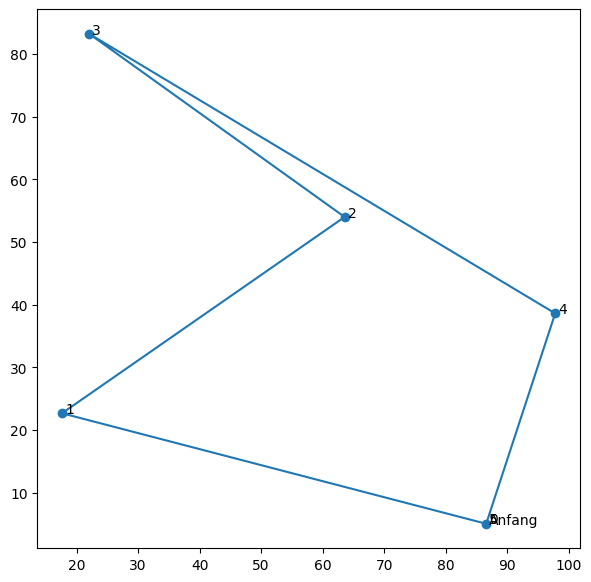

In [2]:
#Test function for makeing sure, that the environment can be stepped through, including plot
env = TSPEnv(5)
x = env.reset()
print(env.step(0))

print(env.current_city)
print(env.step(1))

print(env.step(2))

print(env.step(3))

print(env.step(4))

print(env.visited_cities)
print(env.distance_matrix)
env.plotCities()



In [5]:
#DQNAgent 
import gym
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

STOPS = 5

env = TSPEnv(STOPS)
observation_space = env.reset()

# setup experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                          # attribute in the inner policy to vary             
                               value_max=1.0,                       # maximum value of attribute that is varying
                               value_min=0.1,                       # minimum value of attribute that is varying
                               value_test=0.05,                     # test if the value selected is < 0.05
                               nb_steps=5000)                      # the number of steps between value_max and value_min

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,len(observation_space))))  
model.add(Flatten())
#Hidden layers with 24 nodes each
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 


#Feed-Forward Neural Network Architecture Summary
print(model.summary())

#Defining DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=250,             # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

         

dqn.compile(Adam(learning_rate=1e-3), metrics=['mae','accuracy'])

#Fit and train in the next step

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 512)               5632      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 270,853
Trainable params: 270,853
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#Finally fit and train the agent
history = dqn.fit(env, nb_steps=20000, visualize=False, verbose=1)

Training for 20000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: -55.7073
2058 episodes - episode_reward: -270.655 [-1997.000, -165.000] - loss: 1.514 - mae: 144.208 - accuracy: 0.060 - mean_q: -106.672 - mean_eps: 0.308

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: -46.3044
done, took 134.231 seconds


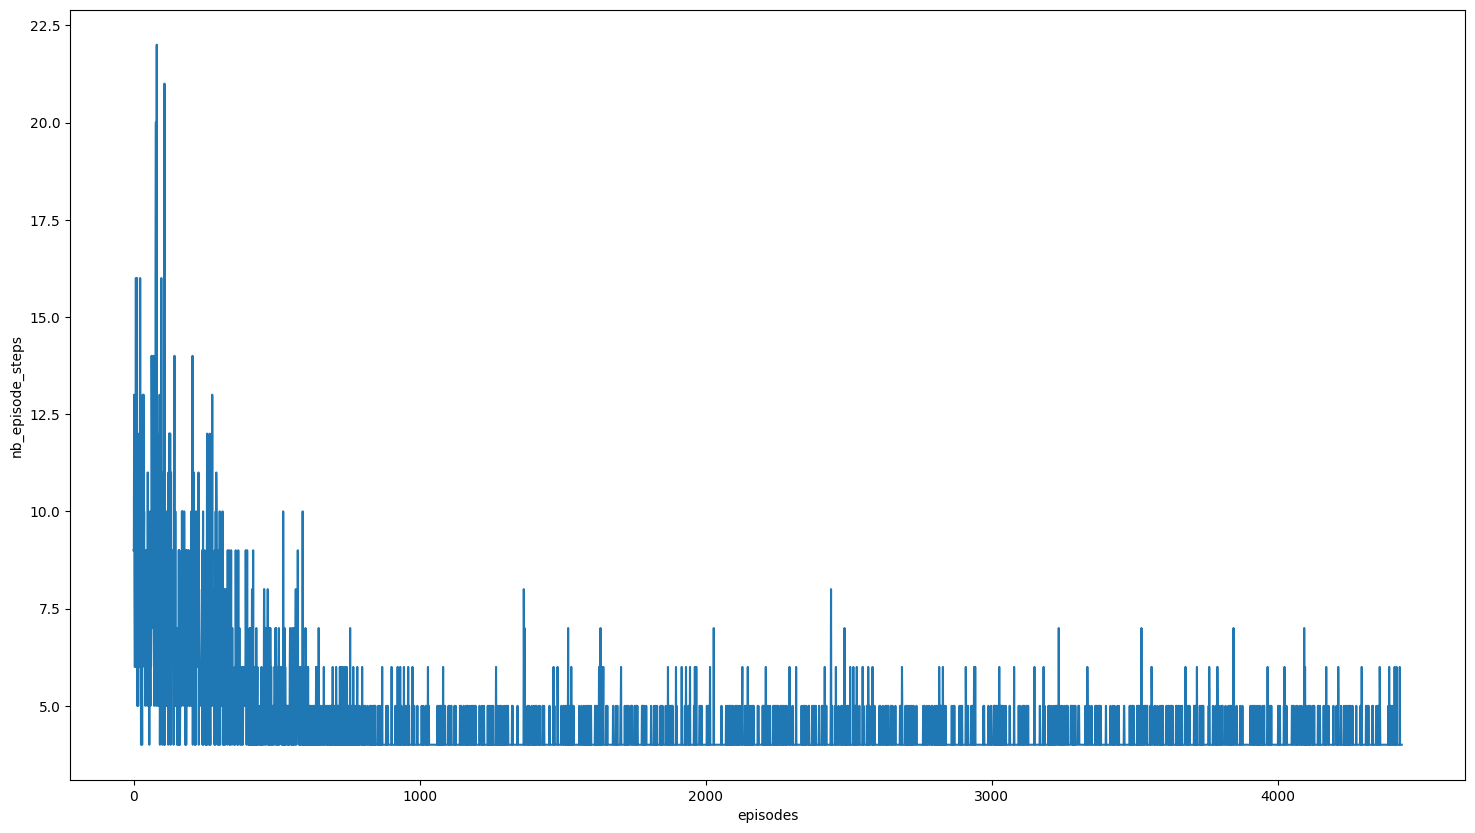

Testing for 20 episodes ...
Episode 1: reward: -165.000, steps: 4
Episode 2: reward: -179.000, steps: 4
Episode 3: reward: -165.000, steps: 4
Episode 4: reward: -165.000, steps: 4
Episode 5: reward: -165.000, steps: 4
Episode 6: reward: -165.000, steps: 4
Episode 7: reward: -171.000, steps: 4
Episode 8: reward: -171.000, steps: 4
Episode 9: reward: -171.000, steps: 4
Episode 10: reward: -165.000, steps: 4
Episode 11: reward: -165.000, steps: 4
Episode 12: reward: -165.000, steps: 4
Episode 13: reward: -171.000, steps: 4
Episode 14: reward: -165.000, steps: 4
Episode 15: reward: -179.000, steps: 4
Episode 16: reward: -165.000, steps: 4
Episode 17: reward: -171.000, steps: 4
Episode 18: reward: -165.000, steps: 4
Episode 19: reward: -171.000, steps: 4
Episode 20: reward: -165.000, steps: 4


In [9]:
# Visualize the history for number of Training episode steps
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

# Finally, evaluate and test our algorithm for 20 episodes.
dqn.test(env, nb_episodes=20, visualize=False)

-204.0


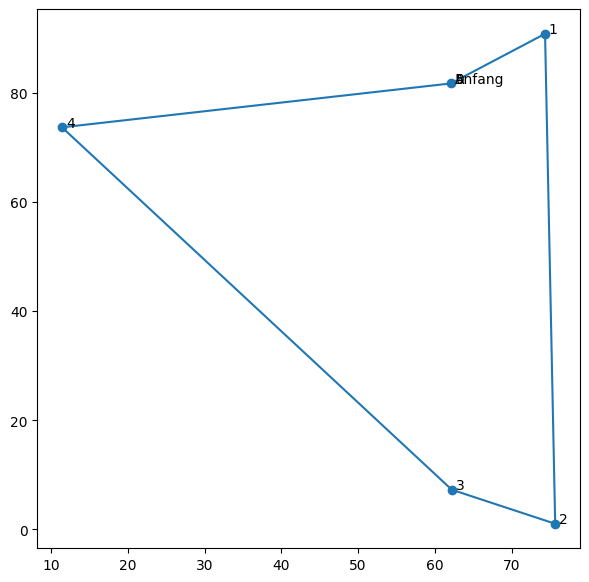

In [7]:
#Testing the prediction of the Agent and plot the outcome
done = False
state = env.reset()


while not done:
    if(len(env.visited_cities) > env.n_cities):
        done = True
    
    next_state = dqn.forward(state)
    
    state_step = env.step(next_state)[0]

print(env._total_distance)
env.plotCities()

In [10]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights-TSP.h5f', overwrite=True)

